# 1.0 Introduction

In this notebook we will complement our previous analysis of the evolution in the percentage of data scientists with the evolution of unemployment. Since data science is being regarded as a promising profession, it was expected to see a rise in number of data scientists. With the tests and plots done in the last notebook we verified that wasn't the case. The opposite happended. We will continue to investigate our initial hypothesis by comparing the unemployment rate between data scientists and other developers. Might be the case that even though we have a decrease in the percentage of data scientists, we still have a high interest of employers in contracting data scientists, if that is the case it is expected for the data scientists to have a smaller unemployement rate compared to other developers.

For this notebook we will adopt a simpler approach and won't make any statistical test. Only graphical analysis will be enough.

## 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
    
sns.set(context='notebook', style='whitegrid')

## 1.2 Loading data

Looking at the schema of each year we identified that the variable regarding the employment status is **EmploymentStatus** for 2017 survey and **Employment** for all the other surveys. Combined with the already identified variable regarding the developer type, we will load the data from all the years (2017-2020) into a datatframe.

In [2]:
def load_data(year):
    # setting up column names according to the survey year
    employment = "EmploymentStatus" if year == 2017 else "Employment"
    devtype = "DeveloperType" if year == 2017 else "DevType"
    
    # setting the file path of the dataset
    file = str(year) + "_data.zip"
    file_path = os.path.join("data", file)
    
    # loading the data and adding the year as a column
    cols = [employment, devtype]
    df = pd.read_csv(file_path, usecols=cols)[cols]
    df.columns = ['employment', 'devtype']
    df['year'] = year
    df.dropna(inplace=True)
    
    return df

In [3]:
# loading and concatenating the data for all the selected years
data = [load_data(year) for year in range(2017, 2021)]
df = pd.concat(data, ignore_index=True)
df.head()

,employment,devtype,year
0,Employed full-time,Other,2017
1,Employed full-time,Mobile developer; Graphics programming; Deskto...,2017
2,Employed full-time,Web developer,2017
3,Employed full-time,Web developer; Mobile developer,2017
4,"Independent contractor, freelancer, or self-em...",Mobile developer; Desktop applications developer,2017


# 2.0 Differences between Data Scientists and Other Developers

## 2.1 Identifying Data Scientists

Here we are replicating the figure generated in another notebook. This is just a process to validate our data wrangling in this notebok that is a little bit different from the other one. From the figure bellow we can see that with different steps we achieved the same result.

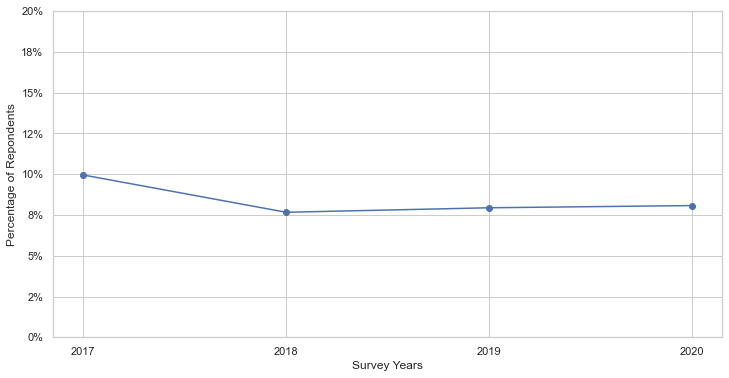

In [4]:
# identifying data scientists
df['data_science'] = df['devtype'].str.contains('Data scientist|Machine learning')

# ploting the evol of the share of data scientists
ax = df.groupby('year')['data_science'].mean().plot(figsize=(12, 6), marker='.', markersize=12)
plt.ylim(0, 0.2)
plt.xticks([2017, 2018, 2019, 2020])
ax.yaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.xlabel('Survey Years')
plt.ylabel('Percentage of Repondents')
#plt.title('Percentage of Data Scientists Developers')
plt.savefig('figs/ds_evol.png', bbox_inches='tight', dpi=300)
plt.show()

Here we also have not so many good news for Data Scients. For all the years, the group of data scientists developers had a greater unemployment rate compared to others developers.

In [5]:
(df.groupby(['data_science', 'year'])
 ['employment'].value_counts(normalize=True)
 [:,:, "Not employed, but looking for work"].
 rename('percent').reset_index().
 pivot(index="year", values="percent", columns="data_science"))

data_science,False,True
year,,
2017,0.012204,0.018915
2018,0.059030,0.082759
2019,0.065442,0.083282
2020,0.037834,0.056921


In [6]:
employment_distribution = (df.groupby(['data_science', 'year'])['employment'].
                           value_counts(normalize=True).rename('percent').reset_index())
unemployed_select = employment_distribution['employment'] == "Not employed, but looking for work"
unemployed_evol = (employment_distribution.loc[unemployed_select].
                   pivot(index='year', values='percent', columns='data_science'))

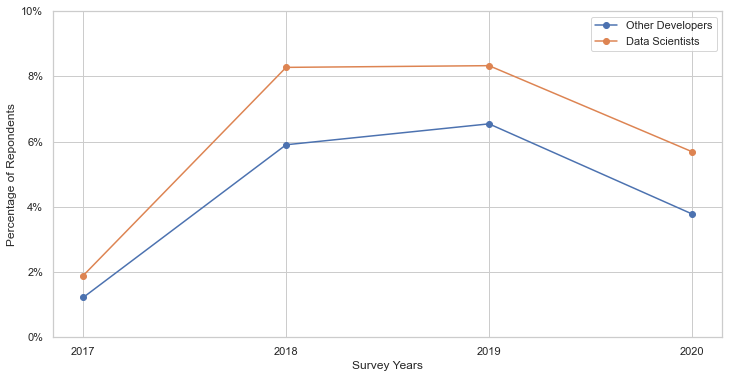

In [7]:
ax = unemployed_evol.plot(figsize=(12, 6), marker='.', markersize=12)
plt.ylim(0, 0.1)
ax.yaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.legend(['Other Developers', 'Data Scientists'])
plt.xticks([2017, 2018, 2019, 2020])
plt.xlabel('Survey Years')
plt.ylabel('Percentage of Repondents')
#plt.title('Comparasion of the Evolution of Unemployment Rate Between\nData Scientists and Other Developers')
plt.savefig('figs/ds_enemplyment.png', bbox_inches='tight', dpi=300)
plt.show()

In [8]:
(unemployed_evol[True] - unemployed_evol[False]).mul(100).round(2)

year
2017    0.67
2018    2.37
2019    1.78
2020    1.91
dtype: float64

In all year the unemployment rate of data scientists were higher than that of the other developers. The highest difference occured in 2018 were we had a difference of 2.37p.p.

In [9]:
(df.groupby('data_science')['employment'].
 value_counts(normalize=True)[:, "Not employed, but looking for work"].
 mul(100).round(2).to_frame('Percent Unemployed'))

,Percent Unemployed
data_science,
False,5.06
True,6.71


With this additional evidence it becames more difficult to believe that data science is really promising at te moment. Maybe the oportunity is already gone. Maybe our survey data is biases and doesn't represent the real population of data scientists. But from the information available in this analysis we couldn't confirm our initial hypothesis that data science is a promissing profession.